In [1]:
from constants import *
from model_manager import section1, section2, single_model

Num GPUs Available:  1


In [2]:
main_folder = "./resilt2/"

In [3]:
import numpy as np
import tensorflow as tf

def get_metrics(model):
    y_pred = model.model.evaluate(model.val_dataset)


    y_labels = []
    for batch in model.val_dataset.take(-1):
        _, coords_batch = batch
        coords_batch = coords_batch.numpy()
        y_labels.append(coords_batch)

    y_labels = np.array(y_labels)
    y_true = y_labels.reshape(-1, y_labels.shape[2])

    # Calculate additional metrics
    # Mean Absolute Error (MAE)
    mae_metric = tf.keras.losses.MeanAbsoluteError()
    mae_value = mae_metric(y_true, y_pred).numpy()
    print("Mean Absolute Error (MAE):", mae_value)

    # Categorical Crossentropy
    crossentropy_metric = tf.keras.losses.CategoricalCrossentropy()
    crossentropy_value = crossentropy_metric(y_true, y_pred).numpy()
    print("Categorical Crossentropy:", crossentropy_value)

    # Accuracy (for classification problems)
    # Convert predictions and true labels to class indices
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_true_classes == y_pred_classes)
    print("Accuracy:", accuracy)
    return mae_value, crossentropy_value, accuracy

In [4]:
def transform_params(params):
    """Transform the parameters to match the desired structure."""
    best_conv = [param for key, param in params.items() if key.startswith('conv')]
    best_dense = [param for key, param in params.items() if key.startswith('dense')]

    # Pass the rest of the parameters unchanged, and only modify conv and dense layers
    params['conv_layers'] = best_conv
    params['dense_layers'] = best_dense
    return params

Initialising data and model...
model compiled with params: {'num_conv_layers': 5, 'num_dense_layers': 4, 'conv_0_size': 4, 'conv_1_size': 4, 'conv_2_size': 20, 'conv_3_size': 36, 'conv_4_size': 10, 'dense_0_size': 194, 'dense_1_size': 217, 'dense_2_size': 164, 'dense_3_size': 16, 'flatten_type': 'global_average', 'activation': 'relu', 'optimizer': 'adam', 'conv_layers': [4, 4, 20, 36, 10], 'dense_layers': [194, 217, 164, 16], 'learning_rate': 0.001, 'dropout': 0.01}


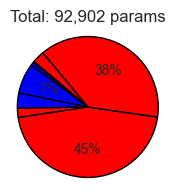

Epoch 1 / 10 - loss: 107.5372 - mean_absolute_error: 5.9614 - val_loss: 14.8766 - val_mean_absolute_error: 2.7726 - 
Target MAE of 5 reached! Stopping training.



h:\aless\Documents\Python_Scripts\Matur\matura-private-main\matura-private-1\model_manager.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
h:\aless\Documents\Python_Scripts\Matur\matura-private-main\matura-private-1\model_manager.py:187: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()
h:\aless\Documents\Python_Scripts\Matur\matura-private-main\matura-private-1\model_manager.py:197: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend()
h:\aless\Documents\Python_Scripts\Matur\matura-private-main\matura-private-1\model_manager.py:207: UserWarning: No artists with labels foun

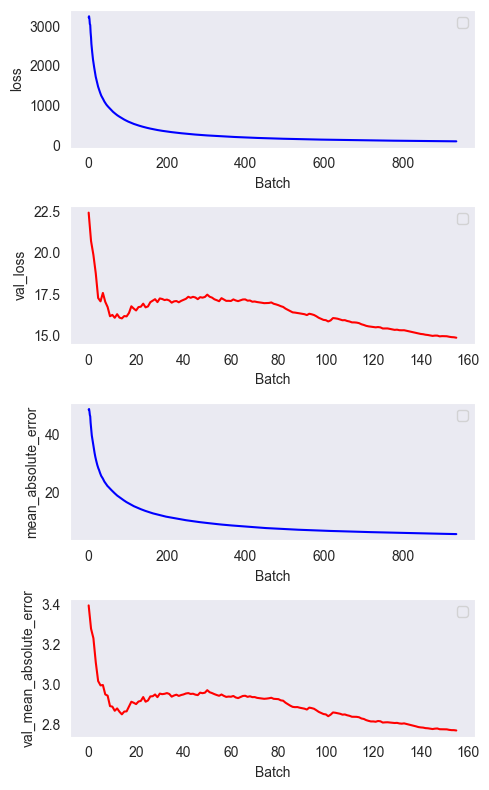

156/156 [==============================] - 1s 5ms/step
Mean Absolute Error (MAE): 2.7740047
Categorical Crossentropy: 58.07549
Accuracy: 0.9802684294871795


(2.7740047, 58.07549, 0.9802684294871795)

In [5]:
model = section1()
params= {
            "num_conv_layers": 5,
            "num_dense_layers": 4,
            "conv_0_size": 4,
            "conv_1_size": 4,
            "conv_2_size": 20,
            "conv_3_size": 36,
            "conv_4_size": 10,
            "dense_0_size": 194,
            "dense_1_size": 217,
            "dense_2_size": 164,
            "dense_3_size": 16,
            "flatten_type": "global_average",
            "activation": "relu",
            "optimizer": "adam"
        }

params = transform_params(params)

model.initialise_data_and_model(params)
params2 = {
    "stop_at": 5,
    "show_progress": True,
}
model.train(params=params2)
model.plot()
model.model.load_weights(main_folder + "best_sect1.weights.h5")
get_metrics(model)

model compiled with params: {'num_conv_layers': 3, 'num_dense_layers': 1, 'conv_0_size': 4, 'conv_1_size': 9, 'conv_2_size': 74, 'dense_0_size': 68, 'flatten_type': 'global_average', 'activation': 'relu', 'optimizer': 'adam', 'conv_layers': [4, 9, 74], 'dense_layers': [68], 'learning_rate': 0.001, 'dropout': 0.01}


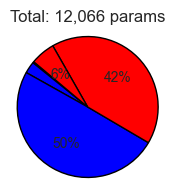

Epoch 1 / 10 - loss: 0.6557 - accuracy: 0.8109 - val_loss: 0.1963 - val_accuracy: 0.9398 - 
Target accuracy of 0.9 reached! Stopping training.



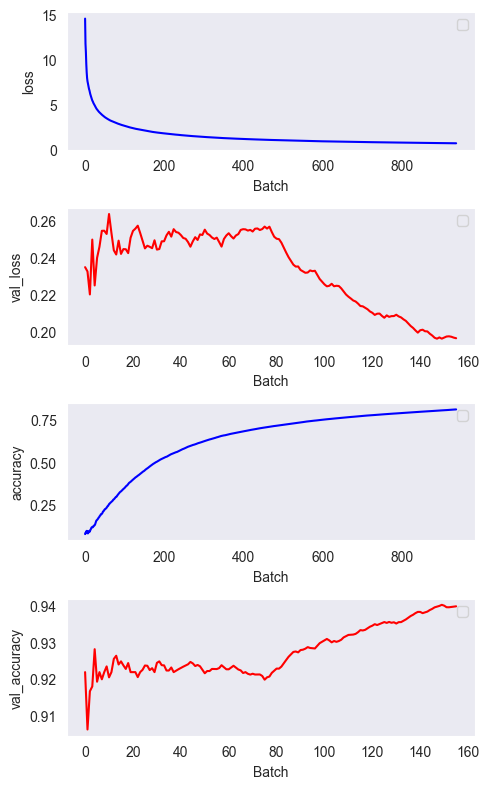

156/156 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 0.021687256
Categorical Crossentropy: 0.22501408
Accuracy: 0.9269831730769231


(0.021687256, 0.22501408, 0.9269831730769231)

In [6]:
model = section2()
params={
            "num_conv_layers": 3,
            "num_dense_layers": 1,
            "conv_0_size": 4,
            "conv_1_size": 9,
            "conv_2_size": 74,
            "dense_0_size": 68,
            "flatten_type": "global_average",
            "activation": "relu",
            "optimizer": "adam"
        }

params = transform_params(params)

model.initialise_data_and_model(params)
params2 = {
    "stop_at": 0.9,
    "show_progress": True,
}
model.train(params=params2)
model.plot()
model.model.load_weights(main_folder + "best_sect2.weights.h5")
get_metrics(model)

model compiled with params: {'num_conv_layers': 5, 'num_dense_layers': 5, 'conv_0_size': 4, 'conv_1_size': 10, 'conv_2_size': 17, 'conv_3_size': 171, 'conv_4_size': 52, 'dense_0_size': 24, 'dense_1_size': 12, 'dense_2_size': 125, 'dense_3_size': 129, 'dense_4_size': 219, 'flatten_type': 'global_average', 'activation': 'relu', 'optimizer': 'adam', 'conv_layers': [4, 10, 17, 171, 52], 'dense_layers': [24, 12, 125, 129, 219], 'learning_rate': 0.001, 'dropout': 0.01}


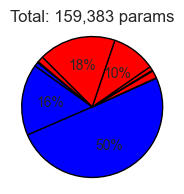

Epoch 2 / 10 - loss: 0.3379 - accuracy: 0.8996 - val_loss: 0.2360 - val_accuracy: 0.9371 - 
Target accuracy of 0.9 reached! Stopping training.



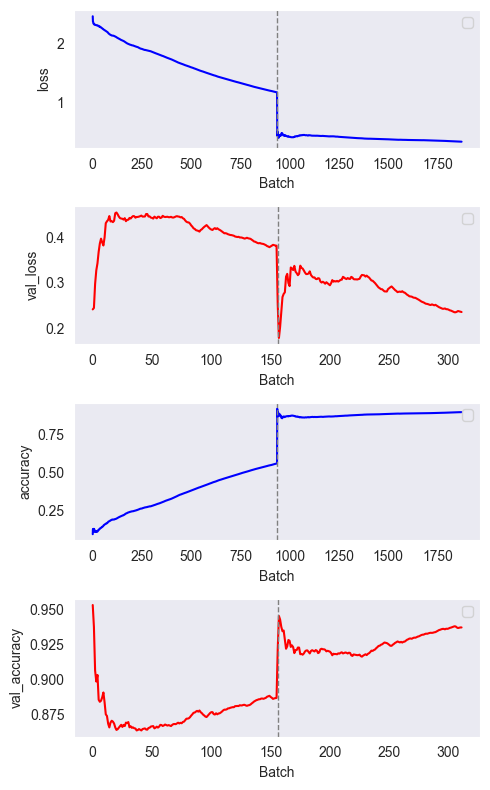

156/156 [==============================] - 1s 6ms/step
Mean Absolute Error (MAE): 0.034380108
Categorical Crossentropy: 0.33173501
Accuracy: 0.9022435897435898


(0.034380108, 0.33173501, 0.9022435897435898)

In [7]:
model = single_model()
params={
            "num_conv_layers": 5,
            "num_dense_layers": 5,
            "conv_0_size": 4,
            "conv_1_size": 10,
            "conv_2_size": 17,
            "conv_3_size": 171,
            "conv_4_size": 52,
            "dense_0_size": 24,
            "dense_1_size": 12,
            "dense_2_size": 125,
            "dense_3_size": 129,
            "dense_4_size": 219,
            "flatten_type": "global_average",
            "activation": "relu",
            "optimizer": "adam"
        }

params = transform_params(params)

model.initialise_data_and_model(params)
params2 = {
    "stop_at": 0.9,
    "show_progress": True,
}
model.train(params=params2)
model.plot()
model.model.load_weights(main_folder + "best_single.weights.h5")
get_metrics(model)